In [1]:
from google.colab import files
files.upload()

Saving dogs-vs-cats.zip to dogs-vs-cats.zip


Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Saving dogs-vs-cats.zip to dogs-vs-cats.zip

In [1]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip
!unzip -qq test1.zip

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)


# Training has 1000 samples, test has 500 samples and validation has 500 samples.

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [4]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [5]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [6]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [7]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [8]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 15s 82ms/step - loss: 0.6946 - accuracy: 0.5055 - val_loss: 0.6926 - val_accuracy: 0.5080
Epoch 2/20
63/63 [==============================] - 6s 81ms/step - loss: 0.6857 - accuracy: 0.5465 - val_loss: 0.6800 - val_accuracy: 0.6070
Epoch 3/20
63/63 [==============================] - 5s 80ms/step - loss: 0.6531 - accuracy: 0.6135 - val_loss: 0.6217 - val_accuracy: 0.6360
Epoch 4/20
63/63 [==============================] - 5s 72ms/step - loss: 0.6271 - accuracy: 0.6520 - val_loss: 0.6195 - val_accuracy: 0.6530
Epoch 5/20
63/63 [==============================] - 5s 71ms/step - loss: 0.6142 - accuracy: 0.6605 - val_loss: 0.6064 - val_accuracy: 0.6950
Epoch 6/20
63/63 [==============================] - 5s 70ms/step - loss: 0.5921 - accuracy: 0.6775 - val_loss: 0.6081 - val_accuracy: 0.6700
Epoch 7/20
63/63 [==============================] - 5s 84ms/step - loss: 0.5577 - accuracy: 0.7155 - val_loss: 0.5874 - val_accuracy: 0.6910
Epoch 8/20
6

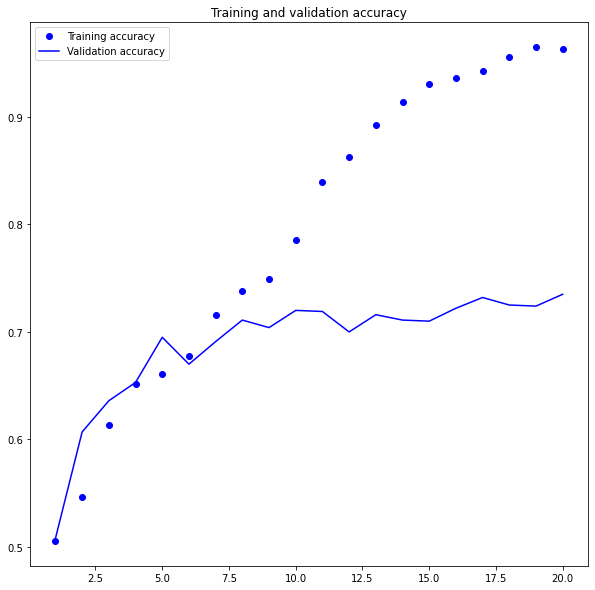

<Figure size 432x288 with 0 Axes>

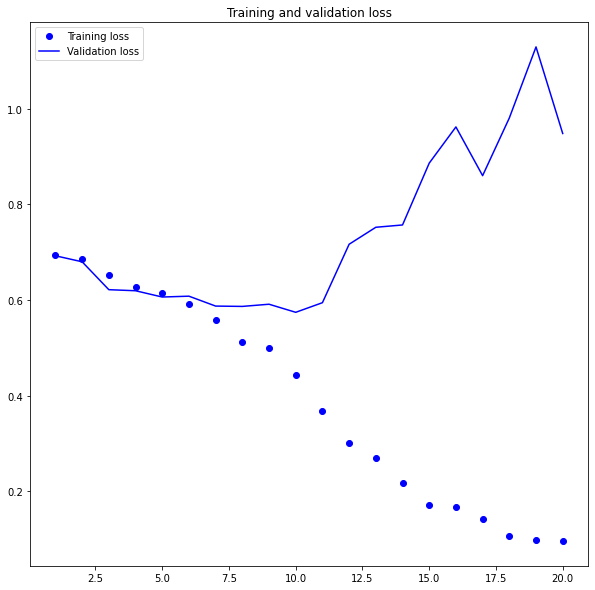

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 36ms/step - loss: 0.6281 - accuracy: 0.6910
Test accuracy: 0.691


In [15]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [16]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

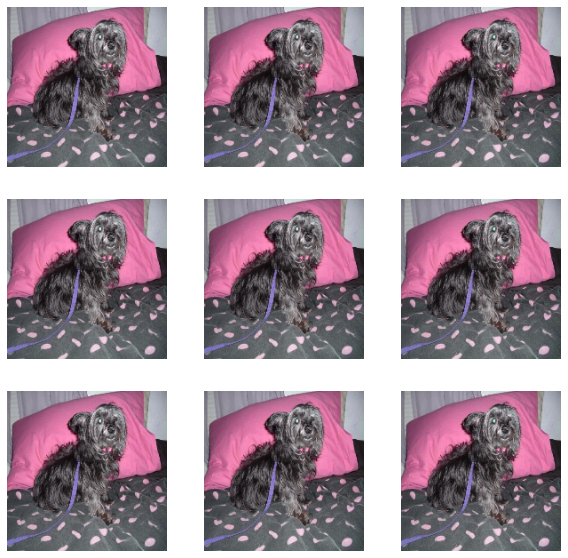

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=5, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=90,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/90
63/63 [==============================] - 10s 122ms/step - loss: 0.6985 - accuracy: 0.4960 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/90
63/63 [==============================] - 7s 111ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/90
63/63 [==============================] - 7s 112ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6922 - val_accuracy: 0.5430
Epoch 4/90
63/63 [==============================] - 7s 110ms/step - loss: 0.6969 - accuracy: 0.5090 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/90
63/63 [==============================] - 8s 125ms/step - loss: 0.6936 - accuracy: 0.4915 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/90
63/63 [==============================] - 7s 110ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/90
63/63 [==============================] - 7s 111ms/step - loss: 0.6933 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch

In [20]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 46ms/step - loss: 0.6904 - accuracy: 0.5180
Test accuracy: 0.518


In [21]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 3000 samples, test has 500 samples and validation has 1000 samples.
make_subset("train", start_index=0, end_index=3000)
make_subset("validation", start_index=3000, end_index=3500)
make_subset("test", start_index=3500, end_index=4500)

In [22]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 8s 97ms/step - loss: 0.6945 - accuracy: 0.5075 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 6s 92ms/step - loss: 0.6924 - accuracy: 0.5195 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 6s 95ms/step - loss: 0.6900 - accuracy: 0.5185 - val_loss: 0.6915 - val_accuracy: 0.5170
Epoch 4/20
63/63 [==============================] - 6s 95ms/step - loss: 0.6874 - accuracy: 0.5600 - val_loss: 0.7500 - val_accuracy: 0.5290
Epoch 5/20
63/63 [==============================] - 7s 104ms/step - loss: 0.6730 - accuracy: 0.5950 - val_loss: 0.7653 - val_accuracy: 0.5620
Epoch 6/20
63/63 [==============================] - 7s 97ms/step - loss: 0.6662 - accuracy: 0.5975 - val_loss: 0.6276 - val_accuracy: 0.6450
Epoch 7/20
63/63 [==============================] - 6s 93ms/step - loss: 0.6516 - accuracy: 0.6335 - val_loss: 0.6603 - val_accuracy: 0.6410
Epoch 8/20
6

In [24]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 46ms/step - loss: 0.5637 - accuracy: 0.7160
Test accuracy: 0.716


In [25]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [27]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 18ms/step


In [28]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 1s 14ms/step - loss: 14.6106 - accuracy: 0.9295 - val_loss: 6.4365 - val_accuracy: 0.9600
Epoch 2/30
63/63 [==============================] - 1s 8ms/step - loss: 2.4558 - accuracy: 0.9800 - val_loss: 6.1341 - val_accuracy: 0.9650
Epoch 3/30
63/63 [==============================] - 1s 8ms/step - loss: 2.7520 - accuracy: 0.9815 - val_loss: 4.2627 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 0s 7ms/step - loss: 1.7345 - accuracy: 0.9880 - val_loss: 5.1496 - val_accuracy: 0.9720
Epoch 5/30
63/63 [==============================] - 0s 6ms/step - loss: 0.4725 - accuracy: 0.9945 - val_loss: 4.8413 - val_accuracy: 0.9710
Epoch 6/30
63/63 [==============================] - 0s 6ms/step - loss: 1.4752 - accuracy: 0.9915 - val_loss: 6.7951 - val_accuracy: 0.9730
Epoch 7/30
63/63 [==============================] - 1s 8ms/step - loss: 1.0509 - accuracy: 0.9935 - val_loss: 4.2212 - val_accuracy: 0.9810
Epoch 8/30
63/63 [

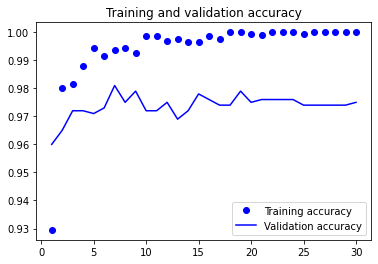

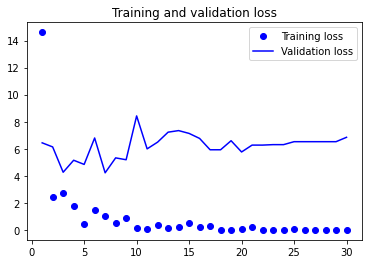

In [29]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [30]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [31]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 32s 409ms/step - loss: 22923.3281 - accuracy: 0.5115 - val_loss: 0.6924 - val_accuracy: 0.5190
Epoch 2/50
63/63 [==============================] - 24s 382ms/step - loss: 1.4044 - accuracy: 0.5245 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 25s 386ms/step - loss: 1.5228 - accuracy: 0.4940 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 25s 389ms/step - loss: 0.6936 - accuracy: 0.4865 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/50
63/63 [==============================] - 25s 390ms/step - loss: 0.6938 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
63/63 [==============================] - 25s 386ms/step - loss: 0.6936 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
63/63 [==============================] - 25s 393ms/step - loss: 0.6931 - accuracy: 0.5095 - val_loss: 0.6940 - val_accuracy: 0.

In [34]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 112ms/step - loss: 0.6930 - accuracy: 0.5070
Test accuracy: 0.507


In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [36]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [37]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
63/63 [==============================] - 16s 220ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 14s 222ms/step - loss: 0.6940 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
63/63 [==============================] - 14s 218ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
63/63 [==============================] - 14s 219ms/step - loss: 0.6936 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
63/63 [==============================] - 14s 216ms/step - loss: 0.6935 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/15
63/63 [==============================] - 15s 235ms/step - loss: 0.6933 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
63/63 [==============================] - 14s 219ms/step - loss: 0.6943 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.5000

In [38]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 108ms/step - loss: 0.6932 - accuracy: 0.5000
Test accuracy: 0.500
